## Pumpkin Varieties and Color

Load up required libraries and dataset. Convert the data to a dataframe containing a subset of the data: 

Let's look at the relationship between color and variety

In [5]:
import pandas as pd
import numpy as np

full_pumpkins = pd.read_csv('../data/US-pumpkins.csv')

full_pumpkins.head()


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [6]:
# tidy the data
columns_to_select = ['City Name','Package','Variety', 'Origin','Item Size', 'Color']
pumpkins = full_pumpkins.loc[:, columns_to_select]

pumpkins.dropna(inplace=True)

pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 2 to 1698
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   City Name  991 non-null    object
 1   Package    991 non-null    object
 2   Variety    991 non-null    object
 3   Origin     991 non-null    object
 4   Item Size  991 non-null    object
 5   Color      991 non-null    object
dtypes: object(6)
memory usage: 54.2+ KB


In [7]:
pumpkins['Color'].unique()

array(['ORANGE', 'WHITE'], dtype=object)

## Visualizing the data

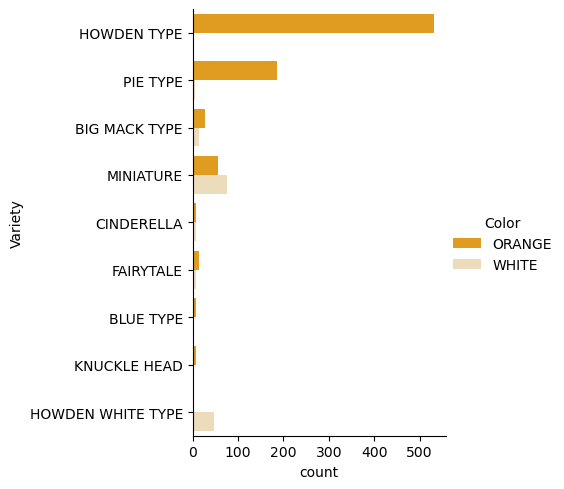

In [8]:
import seaborn as sns

palette = {
'ORANGE': 'orange',
'WHITE': 'wheat',
}

sns.catplot(
data=pumpkins, y="Variety", hue="Color", kind="count",
palette=palette, 
)


## Encoding

In [9]:
pumpkins['Item Size'].unique()

array(['med', 'lge', 'sml', 'xlge', 'med-lge', 'jbo', 'exjbo'],
      dtype=object)

In [10]:
from sklearn.preprocessing import OrdinalEncoder

item_size_categories = [['sml', 'med', 'med-lge', 'lge', 'xlge', 'jbo', 'exjbo']]
ordinal_features = ['Item Size']
ordinal_encoder = OrdinalEncoder(categories=item_size_categories)

In [11]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['City Name', 'Package', 'Variety', 'Origin']
categorical_encoder = OneHotEncoder(sparse_output=False)

In [12]:
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[
    ('ord', ordinal_encoder, ordinal_features),
    ('cat', categorical_encoder, categorical_features)
    ])

ct.set_output(transform='pandas')
encoded_features = ct.fit_transform(pumpkins)

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(pumpkins['Color'])

In [14]:
# merge the encoded features and the label
encoded_pumpkins = encoded_features.assign(Color=encoded_label)

In [15]:
encoded_pumpkins.head()

,ord__Item Size,cat__City Name_ATLANTA,cat__City Name_BALTIMORE,cat__City Name_BOSTON,cat__City Name_CHICAGO,cat__City Name_COLUMBIA,cat__City Name_DALLAS,cat__City Name_DETROIT,cat__City Name_LOS ANGELES,cat__City Name_MIAMI,...,cat__Origin_NEW JERSEY,cat__Origin_NEW YORK,cat__Origin_NORTH CAROLINA,cat__Origin_OHIO,cat__Origin_PENNSYLVANIA,cat__Origin_TENNESSEE,cat__Origin_TEXAS,cat__Origin_VERMONT,cat__Origin_VIRGINIA,Color
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## Analyse the relashionship between color and size

/var/folders/vw/2kmjpl310zl2lwgnwpxsyw4r0000gn/T/ipykernel_36535/3754974362.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


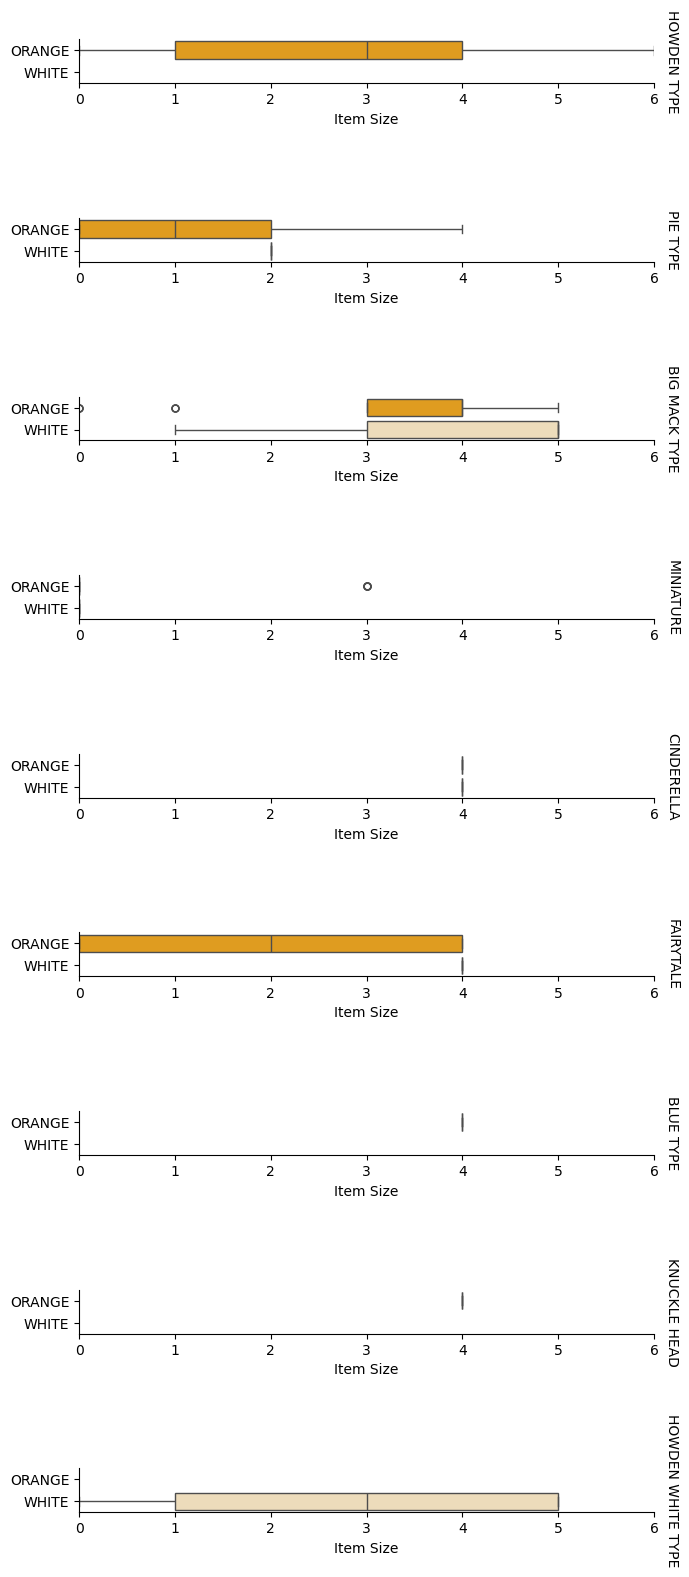

In [16]:
palette = {
'ORANGE': 'orange',
'WHITE': 'wheat',
}
pumpkins['Item Size'] = encoded_pumpkins['ord__Item Size']

g = sns.catplot(
    data=pumpkins,
    x="Item Size", y="Color", row='Variety',
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=1.8, aspect=4, palette=palette,
)
g.set(xlabel="Item Size", ylabel="").set(xlim=(0,6))
g.set_titles(row_template="{row_name}")

/Users/tristanwaddington/anaconda3/envs/CPMS_py_11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 63.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tristanwaddington/anaconda3/envs/CPMS_py_11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Color', ylabel='ord__Item Size'>

/Users/tristanwaddington/anaconda3/envs/CPMS_py_11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tristanwaddington/anaconda3/envs/CPMS_py_11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 35.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


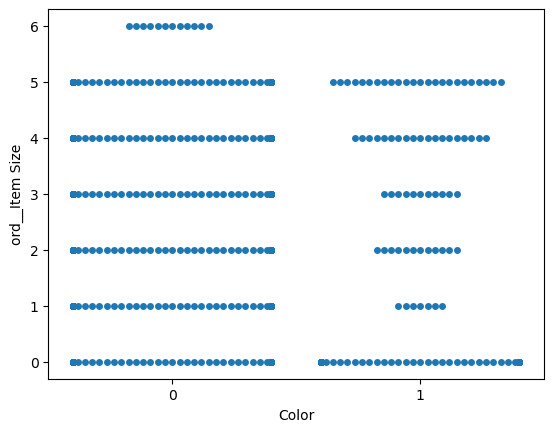

In [17]:
# in a swarm plot
palette = {
    0: 'orange',
    1: 'wheat'
}
sns.swarmplot(x="Color", y="ord__Item Size", data=encoded_pumpkins)

Sigmoid function : 
$$f(x) = \frac{L}{1+e^{-k(x-x_0)}}$$

## Train the model

In [18]:
from sklearn.model_selection import train_test_split

X = encoded_pumpkins[encoded_pumpkins.columns.difference(['Color'])]
y = encoded_pumpkins['Color']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
from sklearn.metrics import f1_score, classification_report 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('F1-score: ', f1_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       166
           1       0.85      0.67      0.75        33

    accuracy                           0.92       199
   macro avg       0.89      0.82      0.85       199
weighted avg       0.92      0.92      0.92       199

Predicted labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 1]
F1-score:  0.7457627118644068


The confusion matrix is a table that is often used to describe the performance of a classification model.
|input \ output | 0 |1|
|---|---|---|
|0|TN|FP|
|1|FN|TP|

precision = $\frac{TP}{TP+FP}$, the real positive proportion among the output ;

recall = $\frac{TP}{TP+FN}$, the real positive proportion from the input.

f1-score: (2 * precision * recall)/(precision + recall) A weighted average of the precision and recall -> best is 1.

Accuracy: (TP + TN)/(TP + TN + FP + FN) The percentage of labels predicted accurately for a sample.



In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[162,   4],
       [ 11,  22]])

## ROC curve - Receiving Operating Characteristic curve

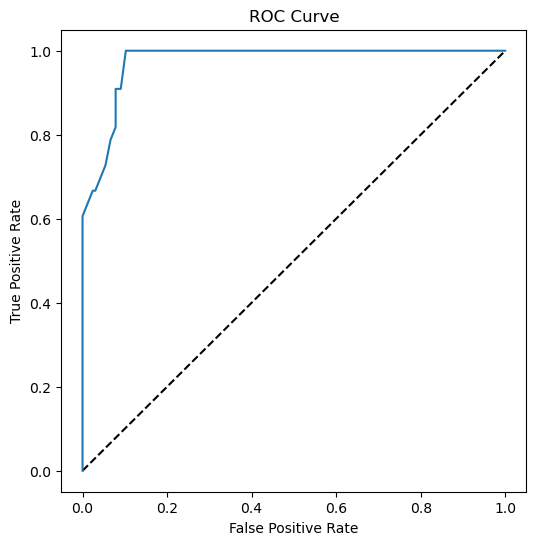

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

y_scores = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [22]:
y_scores[:10]

array([[0.63000373, 0.36999627],
       [0.51907011, 0.48092989],
       [0.93319188, 0.06680812],
       [0.99044033, 0.00955967],
       [0.99525916, 0.00474084],
       [0.99886412, 0.00113588],
       [0.99292818, 0.00707182],
       [0.99523054, 0.00476946],
       [0.94040495, 0.05959505],
       [0.99492771, 0.00507229]])

In [23]:
# Accuracy area under the curve
auc = roc_auc_score(y_test, y_scores[:,1])
print('AUC: %.2f' % auc)

AUC: 0.97


# Challenge
using Kaggle Crop recommendation prediction
https://www.kaggle.com/datasets/varshitanalluri/crop-recommendation-dataset

In [24]:
full_crop = pd.read_csv('../data/Crop_Recommendation.csv')
full_crop.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [25]:
full_crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [26]:
full_crop['Crop'].unique()

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

In [27]:
# Display the number of conditions for each crop
full_crop['Crop'].value_counts()

Crop
Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: count, dtype: int64

In [28]:
# Step 1, only 2 categories
sub_crop = full_crop[full_crop['Crop'].isin(['Rice', 'Maize', 'Jute', 'Cotton'])]

In [29]:
sub_crop

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice
...,...,...,...,...,...,...,...,...
2095,87,44,43,23.874845,86.792613,6.718725,177.514731,Jute
2096,88,52,39,23.928879,88.071123,6.880205,154.660874,Jute
2097,90,39,37,24.814412,81.686889,6.861069,190.788639,Jute
2098,90,39,43,24.447439,82.286484,6.769346,190.968489,Jute


In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(sub_crop['Crop'])

encoded_crop = sub_crop.assign(Crop=encoded_label)

print(encoded_crop)

      Nitrogen  Phosphorus  Potassium  Temperature   Humidity  pH_Value  \
0           90          42         43    20.879744  82.002744  6.502985   
1           85          58         41    21.770462  80.319644  7.038096   
2           60          55         44    23.004459  82.320763  7.840207   
3           74          35         40    26.491096  80.158363  6.980401   
4           78          42         42    20.130175  81.604873  7.628473   
...        ...         ...        ...          ...        ...       ...   
2095        87          44         43    23.874845  86.792613  6.718725   
2096        88          52         39    23.928879  88.071123  6.880205   
2097        90          39         37    24.814412  81.686889  6.861069   
2098        90          39         43    24.447439  82.286484  6.769346   
2099        84          38         43    26.574217  73.819949  7.261581   

        Rainfall  Crop  
0     202.935536     3  
1     226.655537     3  
2     263.964248     3  

In [31]:
# Train the model
from sklearn.model_selection import train_test_split

X = encoded_crop[encoded_crop.columns.difference(['Crop'])]
y = encoded_crop['Crop']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
# try with a regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report
mod_lin = LogisticRegression()
mod_lin.fit(X_train, y_train)
y_predic = mod_lin.predict(X_test)

print(classification_report(y_test, y_predic))
#print(('F1-score: ', f1_score(y_test, y_predic)))

              precision    recall  f1-score   support

           0       0.74      0.88      0.80        16
           1       0.78      1.00      0.88        18
           2       0.89      0.74      0.81        23
           3       1.00      0.83      0.90        23

    accuracy                           0.85        80
   macro avg       0.85      0.86      0.85        80
weighted avg       0.87      0.85      0.85        80



/Users/tristanwaddington/anaconda3/envs/CPMS_py_11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# New try with a logistic regression and a classifier

In [33]:
full_crop = pd.read_csv('../data/Crop_Recommendation.csv')
full_crop.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [37]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()

X = full_crop[full_crop.columns.difference(['Crop'])]
X_normalized = scaler.fit_transform(X.values.reshape(-1,1))
y = full_crop['Crop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# The basic solver lbfgs does not converge, so we use liblinear
lr = OneVsRestClassifier(LogisticRegression(solver='liblinear'))
model = lr.fit(X_train, y_train)

acuracy = model.score(X_test, y_test)
print('Accuracy: ', acuracy)

Accuracy:  0.9613636363636363


In [44]:
# manual tests
def predic_line(index):
    print('Predicted: ', model.predict(X_test.iloc[index:index+1]))
    proba = model.predict_proba(X_test.iloc[index:index+1])
    resultdf = pd.DataFrame(proba, columns=model.classes_)
    topPrediction = resultdf.T.sort_values(by=0, ascending=False)
    print('Probabilities: ', topPrediction.head(5))
    print('Real: ', y_test.iloc[index:index+1])

In [45]:
predic_line(10)

Predicted:  ['MothBeans']
Probabilities:                    0
MothBeans  0.828966
Blackgram  0.111402
Lentil     0.043234
Maize      0.013611
Jute       0.002522
Real:  546    MothBeans
Name: Crop, dtype: object


In [46]:
predic_line(100)

Predicted:  ['Orange']
Probabilities:                      0
Orange       0.602121
Pomegranate  0.233537
Watermelon   0.065746
Jute         0.049427
Maize        0.046303
Real:  1663    Orange
Name: Crop, dtype: object


In [ ]:
# create a plt with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.ravel()
for i, ax in enumerate(axes):
    if i < 4:
        ax.plot(X_test.iloc[i:i+1].T)
        ax.set_title('Real: ' + y_test.iloc[i])
        # remove the x and y axis
        ax.set_xticks([])

In [ ]:
# count the number of cells by value in a tensor
t = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
t.eq(5).sum()
